In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

## Various fixes to the grids.  

Mostly attributes and encoding.  Note some of these are _done_ and copied to the base files.

In [17]:
with xr.open_dataset('LinePGrid.nc', decode_times=False) as grid:
    grid.attrs = {'Conventions': 'CF-1.11',
                  'title': 'Line P cruise grid',
                  'institution': 'Institute of Ocean Sciences, Sidney, BC, Canada',
                  'creator': 'Jody Klymak',
                  'creator_institution': 'University of Victoria, BC, Canada',
                  'email': 'jklymak@uvic.ca',
                  'source': 'Ship CTD data, collected since 1968 along LineP by IOS',
                  'history': 'CTD data from waterproperties.ca, defined area "LineP".  Binned by ProcessStations.ipynb',
                  'comment': 'All casts in "LineP" area were downloaded from waterproperties.ca. '
                             'Profile data was approximately 1-m, but not exactly (for some reason), so '
                              'depth was interpolated to exactly 1-m (leading to a bit of interpolation '
                              'smoothing).  Using the nominal stations locations, casts were assigned to '
                              'a station if they were within 0.12 degrees latitude of the station.  For each '
                              'mission, the deepest profile at each station was retained.  A mission was '
                              'retained if it has at least 4 casts, and the furthest cast was at least  '
                              'as far out as P10.',
                  'references': 'https://github.com/jklymak/LinePGrid/',
                  'keywords': 'CTD, Oceans, Ocean Pressure, '
                              'Water Pressure, Oceans, Ocean Temperature, Water Temperature, '
                              'Oceans, Salinity/Density, Conductivity, Oceans, '
                              'Salinity/Density, Density, Oceans, Salinity/Density, Salinity',
                  'keywords_vocabulary': 'GCMD Science Keywords',
                  'license': 'This data may be redistributed and used without restriction or warranty',
                  'sea_name': 'Coastal Waters of Southeast Alaska and British Columbia',
                  'standard_name_vocabulary': 'CF STandard Name Table v85'
                 }
    grid.depth.attrs = {
        'standard_name': 'depth',
        'long_name': 'depth of CTD [m]',
        'units': 'm',
        'positive': 'down',
        'comment': 'Data was interpolated onto 1-m grid from data that '
                   'was almost on a 1-m grid.  There will be some smoothing.'
    }
    grid.mission_ind.attrs = {
        'long_name': 'mission index',
        'comment': 'index into the mission list' 
    }
    grid.station_ind.attrs = {
        'long_name': 'mission index',
        'comment': 'index in the station list.  Note that P1 is 0, P25 is 24 '
                   'P35 is 25 and P26 is 26.'
    }
    grid.temperature.attrs = {
        'standard_name': 'sea_water_temperature',
        'units': 'Celsius', 
        'long_name': 'Temperature [C]',
        'comment': 'From various CTDs so variable accuracy'
    }
    grid.pressure.attrs = {
        'standard_name': 'sea_water_pressure',
        'units': 'dbar',
        'long_name': 'Pressure [dbar]'
    }
    grid.salinity.attrs = {
        'standard_name': 'sea_water_practical_salinity',
        'units': 'psu',
        'long_name': 'Salinity [psu]',
        'comment': 'From various CTDs, probably from EOS80'
    }
    grid.oxygen.attrs = {
        'standard_name': 'mole_concentration_of_dissolved_molecular_oxygen_in_sea_water',
        'units': 'umol l-1',
        'long_name': 'O2 concentration [umol l^-1]',
        'comment': 'Many older CTDs did not have O2'
    }
    grid.conductivity.attrs = {
        'standard_name': 'sea_water_electrical_conductivity',
        'units': 'S m-1',
        'long_name': 'Conductivity [S m^-1]',
        'comment': 'Conductivty not reported for older CTDs'
    }
    grid.potential_density.attrs = {
        'standard_name': 'sea_water_potential_density',
        'long_name': 'potential density [kg m-3]',
        'comment': 'potential density relative to 0 dbar, using EOS80',
        'units': 'kg m-3'}
    
    grid.potential_temperature.attrs = {
        'standard_name': 'sea_water_potential_temperature',
        'long_name': 'potential temperature [C]',
        'units': 'Celsius',
        'comment': 'potential temperature relative to 0 dbar, using EOS80'}
    
    grid.time.attrs['standard_name'] = 'time'
    grid.time.attrs['long_name'] = 'CTD cast time'
    grid.mission_time.attrs['standard_name'] = 'time'
    grid.mission_time.attrs['long_name'] = 'Average mission time'

    grid.maxdepth.attrs['long_name'] = 'Maximum Cast depth'
    grid.maxdepth.attrs['positive'] = 'down'
    grid.maxdepth.attrs['comment'] = 'Maximum cast depth for this station for this mission'

    grid.alongx.attrs['long_name'] = 'distance along line P [km]'
    grid.alongx.attrs['units'] = 'km'
    grid.alongx.attrs['comment'] = ('km along LineP; P1=0, P26=-1423; negative '
                             'because lineP goes to the west')
    
    grid.station_alongx.attrs['long_name'] = 'distance along line P [km]'
    grid.station_alongx.attrs['units'] = 'km'
    grid.station_alongx.attrs['comment'] = ('Nominal station km along LineP; P1=0, P26=-1423; negative '
                             'because lineP goes to the west')

    grid.latitude.attrs = {'long_name': 'latitude [N]',
                           'standard_name': 'latitude',
                           'units':        'degrees_north'}
    
    grid.longitude.attrs = {'long_name': 'longitude [E]',
                           'standard_name': 'longitude',
                           'units':        'degrees_east',
                           'comment': 'west is less than zero'}

    grid.station_id.attrs = {'long_name': 'Station Name'}
    grid.mission.attrs = {'long_name': 'Mission Name',
                         'comment': 'IOS mission name. Note these '
                                    'are not necessarily in chronological '
                                    'order'}
    grid.mission.attrs = {'long_name': 'Mission Name',
                         'comment': 'IOS mission name. Note these '
                                    'are not necessarily in chronological '
                                    'order'}
    
    # get station lon and lat
    with xr.open_dataset('LinePStations.nc') as stations:
        grid['station_lon'] = ('station_ind', stations.lon.data)
        grid.station_lon.attrs = {'long_name': 'longitude [E]',
                           'standard_name': 'longitude',
                           'units':        'degrees_east',
                           'comment': 'Nominal station location. west is less than zero'}

        grid['station_lat'] = ('station_ind', stations.lat.data)
        grid.station_lat.attrs = {'long_name': 'latitude [N]',
                           'standard_name': 'latitude',
                           'units':        'degrees_north',
                           'comment': 'Nominal station location'}
    
    display(grid)
    grid.to_netcdf('_LinePTemp.nc')
    

<xarray.Dataset> Size: 2GB
Dimensions:                   (depth: 5000, mission_ind: 204, station_ind: 27)
Coordinates:
  * depth                     (depth) float64 40kB 0.5 1.5 ... 4.998e+03 5e+03
  * mission_ind               (mission_ind) int64 2kB 1 4 5 7 ... 503 511 513
  * station_ind               (station_ind) int64 216B 0 1 2 3 4 ... 23 24 25 26
Data variables: (12/26)
    temperature               (depth, mission_ind, station_ind) float64 220MB ...
    pressure                  (depth, mission_ind, station_ind) float64 220MB ...
    salinity                  (depth, mission_ind, station_ind) float64 220MB ...
    oxygen                    (depth, mission_ind, station_ind) float64 220MB ...
    conductivity              (depth, mission_ind, station_ind) float64 220MB ...
    time                      (mission_ind, station_ind) float64 44kB ...
    ...                        ...
    mission_time              (mission_ind) float64 2kB ...
    station_name              (station_ind) <U3 324B ...
    potential_density         (depth, mission_ind, station_ind) float64 220MB ...
    potential_temperature     (depth, mission_ind, station_ind) float64 220MB ...
    station_lon               (station_ind) float64 216B -125.5 ... -145.0
    station_lat               (station_ind) float64 216B 48.58 48.6 ... 50.0
Attributes: (12/15)
    Conventions:               CF-1.11
    title:                     Line P cruise grid
    institution:               Institute of Ocean Sciences, Sidney, BC, Canada
    creator:                   Jody Klymak
    creator_institution:       University of Victoria, BC, Canada
    email:                     jklymak@uvic.ca
    ...                        ...
    references:                https://github.com/jklymak/LinePGrid/
    keywords:                  CTD, Oceans, Ocean Pressure, Water Pressure, O...
    keywords_vocabulary:       GCMD Science Keywords
    license:                   This data may be redistributed and used withou...
    sea_name:                  Coastal Waters of Southeast Alaska and British...
    standard_name_vocabulary:  CF STandard Name Table v85

In [5]:
ds.time

<xarray.DataArray 'time' (time: 335)> Size: 3kB
array(['2024-01-01T00:00:00.000000000', '2024-01-02T00:00:00.000000000',
                                 'NaT', ..., '2024-11-28T00:00:00.000000000',
       '2024-11-29T00:00:00.000000000', '2024-11-30T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 3kB 2024-01-01 2024-01-02 ... 2024-11-30

In [7]:
with xr.open_dataset('test.nc', decode_times=True) as ds:
    print(ds.time)

<xarray.DataArray 'time' (time: 335)> Size: 3kB
array(['2024-01-01T00:00:00.000000000', '2024-01-02T00:00:00.000000000',
                                 'NaT', ..., '2024-11-28T00:00:00.000000000',
       '2024-11-29T00:00:00.000000000', '2024-11-30T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 3kB 2024-01-01 2024-01-02 ... 2024-11-30


In [13]:
!ncdump test.nc

netcdf test {
dimensions:
	time = 335 ;
variables:
	double time(time) ;
		time:_FillValue = NaN ;
		time:units = "days since 2024-01-01 00:00:00" ;
		time:calendar = "proleptic_gregorian" ;
data:

 time = 0, 1, _, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 
    20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 
    38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 
    56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 
    74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 
    92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 
    108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 
    122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 
    136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 
    150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 
    164, 165, 166, 167, 168, 169, 170, 

In [2]:
xr.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:58:31) [Clang 14.0.6 ]
python-bits: 64
OS: Darwin
OS-release: 23.2.0
machine: arm64
processor: arm
byteorder: little
LC_ALL: None
LANG: en_CA.UTF-8
LOCALE: ('en_CA', 'UTF-8')
libhdf5: 1.12.2
libnetcdf: 4.9.1

xarray: 2024.7.0
pandas: 2.0.0
numpy: 1.26.4
scipy: 1.10.1
netCDF4: 1.6.2
pydap: None
h5netcdf: None
h5py: None
zarr: None
cftime: 1.6.2
nc_time_axis: None
iris: None
bottleneck: 1.3.6
dask: 2023.4.1
distributed: 2023.4.1
matplotlib: 3.9.2
cartopy: 0.21.1
seaborn: None
numbagg: None
fsspec: 2023.4.0
cupy: None
pint: None
sparse: None
flox: None
numpy_groupies: None
setuptools: 67.6.1
pip: 23.0.1
conda: None
pytest: 7.3.0
mypy: None
IPython: 8.12.0
sphinx: None


/Users/jklymak/mambaforge/envs/LineP/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [6]:
with xr.open_dataset('LinePGrid.nc', decode_times=True) as grid:
    grid.time.encoding = {'units': 'days since 1900-01-01', 'dtype':'float64', 'calendar':'proleptic_gregorian'}
    grid.mission_time.encoding = {'units': 'days since 1900-01-01', 'dtype':'float64', 'calendar':'proleptic_gregorian'}
    for nn in range(len(grid.station_ind)):
        grid.time[~np.isfinite(grid.latitude[:, nn]), nn] = np.datetime64('nat', 'ns')
    grid.to_netcdf('LinePGridFixed.nc')

In [2]:
with xr.open_dataset('LinePGridFixed.nc', decode_times=True) as grid:
    display(grid.time)

<xarray.DataArray 'time' (mission_ind: 204, station_ind: 27)> Size: 44kB
[5508 values with dtype=datetime64[ns]]
Coordinates:
  * mission_ind  (mission_ind) int64 2kB 1 4 5 7 8 11 ... 498 501 503 511 513
  * station_ind  (station_ind) int64 216B 0 1 2 3 4 5 6 ... 20 21 22 23 24 25 26

In [5]:
with xr.open_dataset('LinePIsoGrid.nc', decode_times=True) as grid:
    grid.time.encoding = {'units': 'days since 1900-01-01', 'dtype':'float64', 'calendar':'proleptic_gregorian'}
    grid.mission_time.encoding = {'units': 'days since 1900-01-01', 'dtype':'float64', 'calendar':'proleptic_gregorian'}
    for nn in range(len(grid.station_ind)):
        grid.time[~np.isfinite(grid.latitude[:, nn]), nn] = np.datetime64('nat', 'ns')
    grid.to_netcdf('LinePIsoGridFixed.nc')

In [18]:
with xr.open_dataset('LineP/2022-008-0078.ctd.nc') as ds:
    display(ds)

<xarray.Dataset> Size: 81kB
Dimensions:                       (z: 1998)
Dimensions without coordinates: z
Data variables: (12/26)
    filename                      <U17 68B ...
    country                       <U6 24B ...
    mission_id                    <U8 32B ...
    scientist                     <U9 36B ...
    project                       <U6 24B ...
    agency                        <U42 168B ...
    ...                            ...
    DOXYZZ01                      (z) float32 8kB ...
    DOXMZZ01                      (z) float32 8kB ...
    CNDCST01                      (z) float32 8kB ...
    sea_water_temperature         (z) float32 8kB ...
    sea_water_practical_salinity  (z) float32 8kB ...
    sea_water_pressure            (z) float32 8kB ...
Attributes: (12/40)
    featureType:               profile
    summary:                   This dataset contains observations made by the...
    title:                     IOS CTD profile data
    institution:               Institute of Ocean Sciences, 9860 West Saanich...
    infoUrl:                   http://www.pac.dfo-mpo.gc.ca/science/oceans/da...
    keywords:                  CTD, conductivity, density, depth, pressure, t...
    ...                        ...
    geospatial_lon_max:        -141.66816666666668
    geospatial_bounds:         POINT (-141.66816666666668, 49.76583333333333)
    id:                        2022-008-0078
    time_coverage_start:       2022-08-18 11:43:07UTC
    time_coverage_end:         2022-08-18 11:43:07UTC
    history:                   {'2023-06-21T21:18:37.046648 UTC': 'Standardiz...

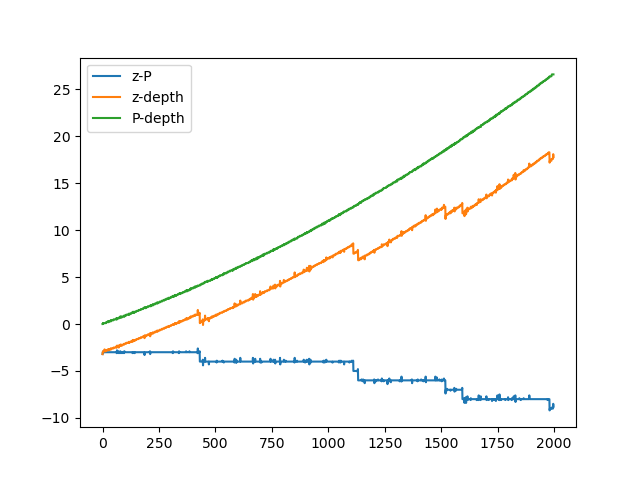

In [44]:
fig, ax = plt.subplots()
ax.plot(ds.z-ds.sea_water_pressure, label='z-P')
ax.plot(ds.z-ds.depth, label='z-depth')
ax.plot(-ds.depth+ds.sea_water_pressure, label='P-depth')
ax.legend()
fig.savefig('Depths.png')

In [46]:
ds.depth[:20]

<xarray.DataArray 'depth' (z: 20)> Size: 80B
array([ 3.2,  4. ,  4.9,  5.9,  6.9,  7.9,  8.9,  9.9, 10.9, 11.7, 12.9, 13.9,
       14.9, 15.9, 16.9, 17.9, 18.8, 19.8, 20.8, 21.8], dtype=float32)
Dimensions without coordinates: z
Attributes:
    positive:       down
    axis:           Z
    long_name:      Depth in meters
    standard_name:  depth_below_sea_level_in_meters
    units:          m

In [42]:
print(ds.time.diff(dim='z'))

<xarray.DataArray 'time' ()> Size: 8B
array('2022-08-18T11:43:07.000000000', dtype='datetime64[ns]')
Attributes:
    long_name:      time
    standard_name:  time


In [47]:
import seawater


In [48]:
seawater.eos80.pden(25.3, 1.4, 0, 0)

1020.2372403285174

In [99]:
cp = 5.35e-2 * 1021.7 / 1000
T0 = 20
T = 1.2
V = 63.63
rho0 = 1021.7
m0 = rho0 * V
drho = (T - T0) * cp

dVT = m0 * drho / rho0 / (rho0 - drho)
densityT = m0 / (V + dVT) 
print(densityT)
target = 1019
# target = (m0 + add) / (V + dV)
add = target * (V + dVT) - m0
print(add)

add = -60
dVpump = 0.425
newdensityT = (m0 + add) / (V + dVT + dVpump) 

print(f'added weight {add}g; temperature: {T} C;  pressure: 0; pump: {dVpump} L; rho = {newdensityT}')

dVpump = 0
newdensityT = (m0 + add) / (V + dVT + dVpump) 

print(f'added weight {add}g; temperature: {T} C;  pressure: 0; pump: {dVpump} L; rho = {newdensityT}')
# at 600 m:


dVp = -0.18
T = 0.5
drho = (T - T0) * cp
dVT = m0 * drho / rho0 / (rho0 - drho)
print(dVT)
dVpump = -0.260
density = (rho0 * V + add)/(V + dVT + dVp + dVpump)
print(f'added weight {add}g; temperature: {T} C;  pressure: 600; pump: {dVpump} L; rho = {density}')
dVpump = -0.425
density = (rho0 * V + add)/(V + dVT + dVp + dVpump)
print(f'added weight {add}g; temperature: {T} C;  pressure: 600; pump: {dVpump} L; rho = {density}')
goal = 1031
add = goal * (V + dVT + dVp + dVpump) - rho0 * V
print(add)


1022.7276258600001
-236.95050865020312
added weight -60g; temperature: 1.2 C;  pressure: 0; pump: 0.425 L; rho = 1014.9974960513177
added weight -60g; temperature: 1.2 C;  pressure: 0; pump: 0 L; rho = 1021.7837260014428
-0.06631281665402569
added weight -60g; temperature: 0.5 C;  pressure: 600; pump: -0.26 L; rho = 1028.9445040076187
added weight -60g; temperature: 0.5 C;  pressure: 600; pump: -0.425 L; rho = 1031.6411269957512
-100.36451397030032


In [96]:
with xr.open_dataset('http://206.12.89.152:8080/thredds/dodsC/allgrids/dfo-mike579-20240902_grid.nc') as ds:
    print(ds)
    print(ds.time)

<xarray.Dataset> Size: 51kB
Dimensions:                (depth: 110, time: 3)
Coordinates:
  * depth                  (depth) float64 880B 0.5 10.5 ... 1.08e+03 1.09e+03
    profile                (time) float64 24B ...
  * time                   (time) datetime64[ns] 24B 2024-09-02T21:18:55.9952...
    longitude              (time) float64 24B ...
    latitude               (time) float64 24B ...
Data variables: (12/22)
    profile_time_start     (time) datetime64[ns] 24B ...
    profile_time_end       (time) datetime64[ns] 24B ...
    mission_number         int32 4B ...
    heading                (depth, time) float64 3kB ...
    pitch                  (depth, time) float64 3kB ...
    roll                   (depth, time) float64 3kB ...
    ...                     ...
    salinity               (depth, time) float64 3kB ...
    potential_density      (depth, time) float64 3kB ...
    density                (depth, time) float64 3kB ...
    potential_temperature  (depth, time) float64

In [100]:
0.1/np.sin(np.pi*26/180)

0.22811720327048593

In [3]:
with xr.open_dataset('LinePGrid.nc') as ds:
    print(ds)

<xarray.Dataset> Size: 2GB
Dimensions:                   (depth: 5000, mission_ind: 204, station_ind: 27)
Coordinates:
  * depth                     (depth) float64 40kB 0.5 1.5 ... 4.998e+03 5e+03
  * mission_ind               (mission_ind) int64 2kB 1 4 5 7 ... 503 511 513
  * station_ind               (station_ind) int64 216B 0 1 2 3 4 ... 23 24 25 26
Data variables: (12/26)
    temperature               (depth, mission_ind, station_ind) float64 220MB ...
    pressure                  (depth, mission_ind, station_ind) float64 220MB ...
    salinity                  (depth, mission_ind, station_ind) float64 220MB ...
    oxygen                    (depth, mission_ind, station_ind) float64 220MB ...
    conductivity              (depth, mission_ind, station_ind) float64 220MB ...
    time                      (mission_ind, station_ind) datetime64[ns] 44kB ...
    ...                        ...
    mission_time              (mission_ind) datetime64[ns] 2kB ...
    station_name          

In [4]:
with xr.open_dataset('LinePIsoGrid.nc') as ds:
    print(ds)

<xarray.Dataset> Size: 2GB
Dimensions:                   (isodepths: 5000, mission_ind: 204,
                               station_ind: 27)
Coordinates:
  * isodepths                 (isodepths) float64 40kB 0.5 1.5 ... 5e+03
  * mission_ind               (mission_ind) int64 2kB 1 4 5 7 ... 503 511 513
  * station_ind               (station_ind) int64 216B 0 1 2 3 4 ... 23 24 25 26
Data variables: (12/28)
    mean_potential_density    (isodepths) float64 40kB ...
    temperature               (isodepths, mission_ind, station_ind) float64 220MB ...
    pressure                  (isodepths, mission_ind, station_ind) float64 220MB ...
    salinity                  (isodepths, mission_ind, station_ind) float64 220MB ...
    oxygen                    (isodepths, mission_ind, station_ind) float64 220MB ...
    conductivity              (isodepths, mission_ind, station_ind) float64 220MB ...
    ...                        ...
    station_name              (station_ind) <U3 324B ...
    poten